## Análise dos dados

In [1]:
#importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# método para particionar dados
from sklearn.model_selection import train_test_split

#método de avaliação de modelo (erro)
from sklearn.metrics import mean_absolute_error

#importando técnicas
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
#Carregando os dados do CSV em um Dataframe Pandas e exibindo primeiros registros
wine_df = pd.read_csv('winequality-red.csv', sep = ';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#matriz de correlação
wine_df.corr(numeric_only=True).round(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,-0.2561,0.6717,0.1148,0.0937,-0.1538,-0.1132,0.6680,-0.6830,0.1830,-0.0617,0.1241
volatile acidity,-0.2561,1.0000,-0.5525,0.0019,0.0613,-0.0105,0.0765,0.0220,0.2349,-0.2610,-0.2023,-0.3906
citric acid,0.6717,-0.5525,1.0000,0.1436,0.2038,-0.0610,0.0355,0.3649,-0.5419,0.3128,0.1099,0.2264
residual sugar,0.1148,0.0019,0.1436,1.0000,0.0556,0.1870,0.2030,0.3553,-0.0857,0.0055,0.0421,0.0137
chlorides,0.0937,0.0613,0.2038,0.0556,1.0000,0.0056,0.0474,0.2006,-0.2650,0.3713,-0.2211,-0.1289
free sulfur dioxide,-0.1538,-0.0105,-0.0610,0.1870,0.0056,1.0000,0.6677,-0.0219,0.0704,0.0517,-0.0694,-0.0507
total sulfur dioxide,-0.1132,0.0765,0.0355,0.2030,0.0474,0.6677,1.0000,0.0713,-0.0665,0.0429,-0.2057,-0.1851
density,0.6680,0.0220,0.3649,0.3553,0.2006,-0.0219,0.0713,1.0000,-0.3417,0.1485,-0.4962,-0.1749
pH,-0.6830,0.2349,-0.5419,-0.0857,-0.2650,0.0704,-0.0665,-0.3417,1.0000,-0.1966,0.2056,-0.0577
sulphates,0.1830,-0.2610,0.3128,0.0055,0.3713,0.0517,0.0429,0.1485,-0.1966,1.0000,0.0936,0.2514


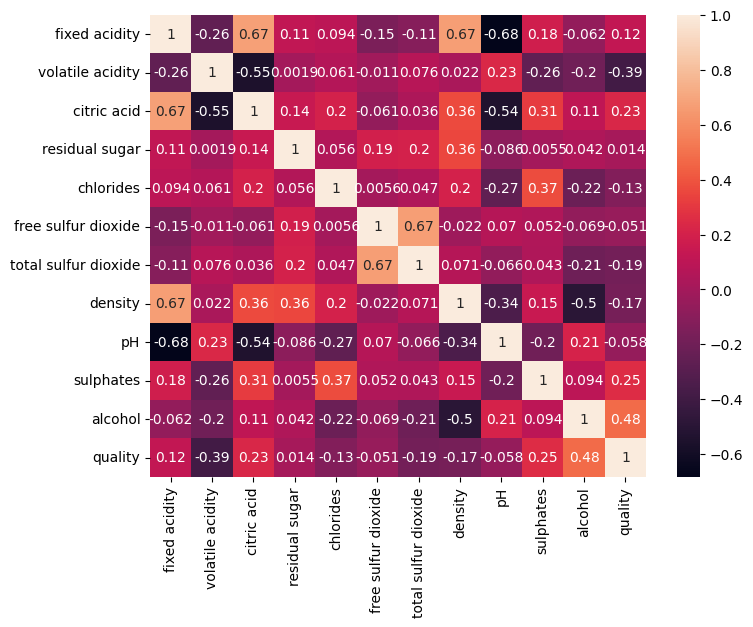

In [4]:
corr = wine_df.corr()
features = corr.index
plt.figure(figsize=(8,6))
ax = sns.heatmap(wine_df[features].corr(),annot=True)

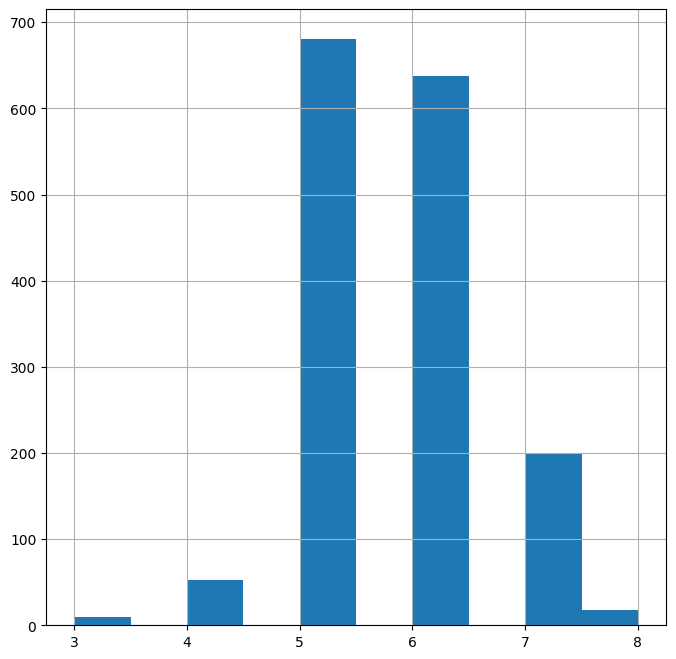

In [5]:
plot = wine_df['quality'].hist(figsize=(8,8))
plt.show()

In [6]:
#particionando dados em X e Y
X = wine_df[['alcohol', 'volatile acidity']]  # Variáveis explicativas
Y = wine_df['quality']  # Variável alvo

## Treinamento dos modelos

In [ ]:
# Cria as listas para armazenar os erros dos modelos
errorsLinearRegression = []
errorsDecisionTreeRegressor = []

interactions = 45

for i in range(0, interactions):
    # 70% dos dados para treinar e 30% para avaliar/testar
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7)
    
    # Regressao Linear
    modeloLinearRegression = LinearRegression()
    modeloLinearRegression.fit(X_train, Y_train)
    # Faz as prediçoes no dataset de teste
    predicoesLinearRegression = modeloLinearRegression.predict(X_test)
    avaliacaoLinear = mean_absolute_error(Y_test, predicoesLinearRegression)
    errorsLinearRegression.append(avaliacaoLinear)


    # Arvore de decisao
    modeloDecisionTreeRegressor = DecisionTreeRegressor()
    modeloDecisionTreeRegressor.fit(X_train, Y_train)
    # Faz as prediçoes no dataset de teste
    predicoesDecisionTreeRegressor = modeloDecisionTreeRegressor.predict(X_test)
    avaliacaoTree = mean_absolute_error(Y_test, predicoesDecisionTreeRegressor)
    errorsDecisionTreeRegressor.append(avaliacaoTree)


# print('X_train shape: ', X_train.shape)
# print('X_test shape: ', X_test.shape)
# print('y_train shape: ', Y_train.shape)
# print('y_test shape: ', Y_test.shape)

### Análise dos Modelos

In [8]:
# Calcula a media e o desvio padrao dos modelos
mediaErrosLinear = np.mean(errorsLinearRegression)
desvioPadraoErrosLinear = np.std(errorsLinearRegression)

mediaErrosTree = np.mean(errorsDecisionTreeRegressor)
desvioPadraoErrosTree = np.std(errorsDecisionTreeRegressor)

# print("Erro Médio Absoluto:")
# print(f"LinearRegression: {avaliacaoLinear} ({avaliacaoLinear * 100:.2f}%)")
# print(f"DecisionTreeRegressor: {avaliacaoTree} ({avaliacaoTree * 100:.2f}%)")

In [13]:
# Exibindo as metricas de erro com pandas
pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Árvore de Decisão'],
    'Erro Médio': [mediaErrosLinear, mediaErrosTree],
    'Desvio Padrão': [desvioPadraoErrosLinear, desvioPadraoErrosTree]
})


,Modelo,Erro Médio,Desvio Padrão
0,Regressão Linear,0.525178,0.017432
1,Árvore de Decisão,0.544359,0.026185


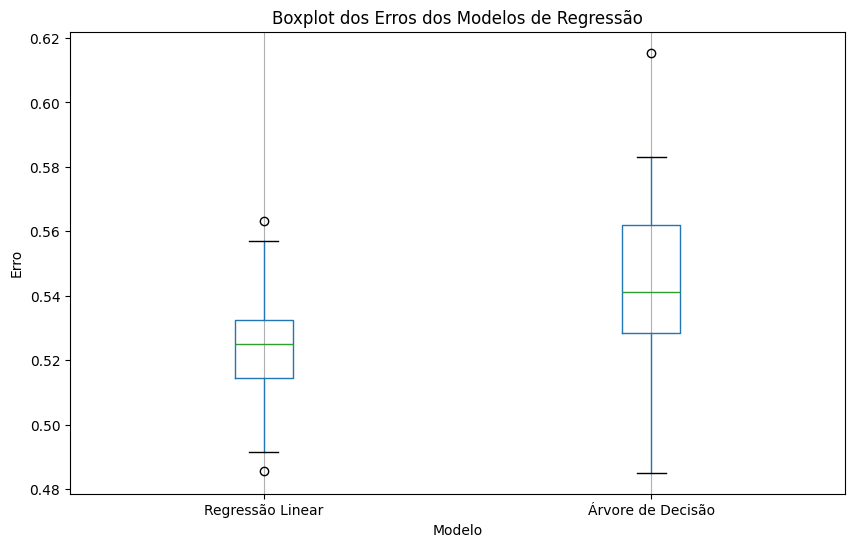

In [16]:
# Exibindo os dados em um grafico boxplot

metricas_df = pd.DataFrame({
    'Regressão Linear': errorsLinearRegression,
    'Árvore de Decisão': errorsDecisionTreeRegressor
})

# Criar o boxplot
plt.figure(figsize=(10, 6))
metricas_df.boxplot()
plt.title('Boxplot dos Erros dos Modelos de Regressão')
plt.ylabel('Erro')
plt.xlabel('Modelo')
plt.grid(axis='y')
plt.show()